# 简单版本
**loss 使用 二次代价函数**

In [1]:
import os
t = os.listdir(os.getcwd())

In [2]:
print(t)


['.ipynb_checkpoints', 'BasicOperation.md', 'Basic_neural_network.ipynb', 'Imitation.ipynb', 'LogisticRegression.ipynb', 'MNIST.ipynb', 'MNIST_data', 'Note.md', 'reduce_mean_reduce_sum.md', 'SimpleLinearRegression.ipynb', 'Variable.md']


In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data",one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
# 每个批次的大小
batch_size = 100;
#计算总共有多少个批次
n_batch = mnist.train.num_examples // batch_size;

In [6]:
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784]);
y = tf.placeholder(tf.float32,[None,10]);


In [7]:
#创建一个简单的神经网络
W = tf.Variable(tf.ones([784,10]));
b = tf.Variable(tf.ones([10]));
prediction1 = tf.nn.softmax(tf.matmul(x,W)+b);


In [8]:
# 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction));  #MSE
#cross_entropy = -tf.reduce_sum(y*tf.log(prediction))

#使用梯度下降法优化器
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss);

In [9]:
#初始化变量
init = tf.global_variables_initializer()

In [10]:
# 结果放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))

In [11]:
# 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32));

In [12]:
with tf.Session() as sess:
    sess.run(init);
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size);
            sess.run(train_step,feed_dict = {x : batch_xs, y : batch_ys});
        
        acc = sess.run(accuracy,feed_dict = {x : mnist.test.images , y: mnist.test.labels});
        print("Iter" + str(epoch) + ",Testing Accuray" + str(acc));

Iter0,Testing Accuray0.7407
Iter1,Testing Accuray0.8299
Iter2,Testing Accuray0.859
Iter3,Testing Accuray0.8708
Iter4,Testing Accuray0.8778
Iter5,Testing Accuray0.8809
Iter6,Testing Accuray0.8847
Iter7,Testing Accuray0.8883
Iter8,Testing Accuray0.891
Iter9,Testing Accuray0.8946
Iter10,Testing Accuray0.8967
Iter11,Testing Accuray0.8974
Iter12,Testing Accuray0.8985
Iter13,Testing Accuray0.8996
Iter14,Testing Accuray0.9
Iter15,Testing Accuray0.9018
Iter16,Testing Accuray0.9023
Iter17,Testing Accuray0.9033
Iter18,Testing Accuray0.9045
Iter19,Testing Accuray0.9053
Iter20,Testing Accuray0.9059


# 使用交叉熵

In [17]:
prediction2 = tf.matmul(x,W)+b;
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction2,labels = y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss);
with tf.Session() as sess:
    sess.run(init);
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size);
            sess.run(train_step,feed_dict = {x : batch_xs, y : batch_ys});
        
        acc = sess.run(accuracy,feed_dict = {x : mnist.test.images , y: mnist.test.labels});
        print("Iter" + str(epoch) + ",Testing Accuray" + str(acc));

Iter0,Testing Accuray0.9017
Iter1,Testing Accuray0.9095
Iter2,Testing Accuray0.9146
Iter3,Testing Accuray0.9165
Iter4,Testing Accuray0.9188
Iter5,Testing Accuray0.9194
Iter6,Testing Accuray0.9207
Iter7,Testing Accuray0.9215
Iter8,Testing Accuray0.9211
Iter9,Testing Accuray0.9203
Iter10,Testing Accuray0.9235
Iter11,Testing Accuray0.9222
Iter12,Testing Accuray0.922
Iter13,Testing Accuray0.9217
Iter14,Testing Accuray0.923
Iter15,Testing Accuray0.9227
Iter16,Testing Accuray0.9238
Iter17,Testing Accuray0.9236
Iter18,Testing Accuray0.9239
Iter19,Testing Accuray0.9229
Iter20,Testing Accuray0.9237


# 使用隐藏层

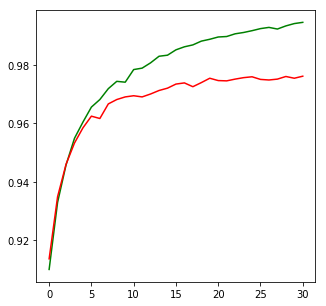

In [34]:
import tensorflow as tf
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784]);
y = tf.placeholder(tf.float32,[None,10]);
keep_prob = tf.placeholder(tf.float32)
# 定义第一个隐藏层
W1 = tf.Variable(tf.truncated_normal([784,100],stddev = 0.1))
b1 = tf.Variable(tf.zeros([100]) + 0.1);
L1 = tf.nn.relu(tf.matmul(x,W1) + b1);
L1_drop = tf.nn.dropout(L1,keep_prob);
# 定输出层
W2= tf.Variable(tf.truncated_normal([100,10],stddev = 0.1))
b2 = tf.Variable(tf.zeros([10]) + 0.1);
prediction = tf.matmul(L1,W2) + b2;

# 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction,labels = y))

# 梯度下降优化
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss);
Train = [];
Test = [];
#初始化变量
init = tf.global_variables_initializer()
# 结果放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
# 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32));

with tf.Session() as sess:
    sess.run(init);
    for epoch in range(31):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size);
            sess.run(train_step,feed_dict = {x : batch_xs, y : batch_ys,kepp_prob:1});
        
        test_acc = sess.run(accuracy,feed_dict = {x : mnist.test.images , y: mnist.test.labels，keep_prob:1.0});
        train_acc = sess.run(accuracy,feed_dict = {x : mnist.train.images , y: mnist.train.labels:1.0});
        Train.append(train_acc);
        Test.append(test_acc);
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (5,5));
plt.plot(np.arange(31),Train,label = "Train accuracy",color = "green");
plt.plot(np.arange(31),Test,label = "Test accuracy",color = "red");
plt.show()

# result :  过拟合了

In [ ]:
# 使用了dropout防止过拟合

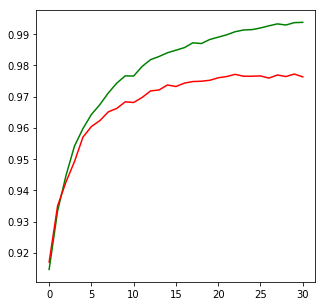

In [37]:
import tensorflow as tf
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784]);
y = tf.placeholder(tf.float32,[None,10]);
keep_prob = tf.placeholder(tf.float32)
# 定义第一个隐藏层
W1 = tf.Variable(tf.truncated_normal([784,100],stddev = 0.1))
b1 = tf.Variable(tf.zeros([100]) + 0.1);
L1 = tf.nn.relu(tf.matmul(x,W1) + b1);
L1_drop = tf.nn.dropout(L1,keep_prob);
# 定输出层
W2= tf.Variable(tf.truncated_normal([100,10],stddev = 0.1))
b2 = tf.Variable(tf.zeros([10]) + 0.1);
prediction = tf.matmul(L1,W2) + b2;

# 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction,labels = y))

# 梯度下降优化
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss);
Train = [];
Test = [];
#初始化变量
init = tf.global_variables_initializer()
# 结果放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
# 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32));

with tf.Session() as sess:
    sess.run(init);
    for epoch in range(31):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size);
            sess.run(train_step,feed_dict = {x : batch_xs, y : batch_ys,keep_prob:0.5});
        
        test_acc = sess.run(accuracy,feed_dict = {x : mnist.test.images , y: mnist.test.labels,keep_prob:1.0});
        train_acc = sess.run(accuracy,feed_dict = {x : mnist.train.images , y: mnist.train.labels,keep_prob:1.0});
        Train.append(train_acc);
        Test.append(test_acc);
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (5,5));
plt.plot(np.arange(31),Train,label = "Train accuracy",color = "green");
plt.plot(np.arange(31),Test,label = "Test accuracy",color = "red");
plt.show()


# hhh,还是过拟合了
